## Auto-Correlation Function

* Definition 
    * Formula
    * Code
* Examples
    * Air passengers data
    * Random data
    * Polynomial data

### Formula and Interpretation

Here is auto-correlation formula (Pearson Formula):

### $a_k = \frac{\sum^T_{t=k+1} (y_t-\bar{y})(y_{t-k}-\bar{y})}{\sum_{t=1}(y_t-\bar{y})^2}$

interpretation of the formula and terminology:

it is called auto-correlation because it measures the correlation of data set with different lagged version of **itself**. The k-lagged series is a copy of the original series which is shifted k time steps. $a_k$ must reflect how corelated the data with k time steps difference are. studying of fluctuation around the mean can hint us at how much data are correlated, for example if a data point and its k-lagged both are above or both below the mean value, they contribute a positive term in the nominator of $a_k$, if this is true for the large fraction of data points it is a hint that data are correlated with k-steps time difference. 


In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.datasets import AirPassengersDataset

import warnings
warnings.filterwarnings("ignore")

### Auto-correlation function in python:

In [107]:
def auto_corr(time_series, lag):
    
    mean = time_series.mean()
    sum_lagged = 0
    norm = 0
    for ix, dd in enumerate(time_series):
        nn=dd.values()[0][0]
        if ix+lag < len(time_series):
            sum_lagged += (nn-mean)*(time_series[ix+lag].values()[0][0]-mean)
        
        norm += (nn-mean)**2
    
    ac = sum_lagged/norm 
        
    return ac
    

### Auto-Correlation of Air passenger data set

In [ ]:

series = AirPassengersDataset().load()


In [108]:
ac_list = [auto_corr(series, ll) for ll in range(100)]

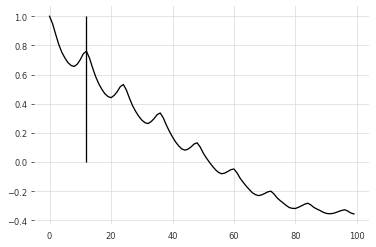

In [109]:
plt.plot(range(100), ac_list)
plt.vlines(12, 0, 1)

In the above plot we see a decrease in value for intermediate time lags. However in **smaller** intervals, as indicated by the vertical line, we see that after a local minimum, correlation increases by the increase in the lag time. For larger time- lags we observe that value of the correlation increases, but data are negatively correlated. We observe two main properties of data:

* Seasonality in small intervals
* Yearly decrease 
    * Decrease in value for intermediate k lags
    * Increase in value but with negative sign for larger lags
    
The last point suggests the existance of a decreasing or increasing trend in data with time, Here is why:
when you get for inermediate time-lags you get small auto correlation, this can be the resullt of having the data point on one side of the time lag too close to the mean value of the time-series. However for larger time lags both sides are far from the mean value so the term $(y_t-\bar y)(y_{t-k}-\bar y)$ will have a large value but the negative sign tells us these data points are on the oppposit side of the mean value. So we expect a **trend**. However we cannot directly see if this large scale behavior is linear or quadratic or anything else. To see how we can learn more from this function, we play with some dummy data, where we enforce certain behavior and see how that behavior is represented by the auto-correlation function.
    

## Auto-correlation for different data sets:

In the following we generate data set with different time dependencies such random, linear and quadratic  and a step function. We investigate the auto-correlation of these data sets. we want to see what properties of data is reflected by auto-correlation function.

### Random data

In [187]:
rtime=300 
from numpy.random import default_rng
rng = default_rng()
rdata = rng.integers(low=10, high=100, size=rtime)

random_time_series = TimeSeries.from_values( rdata) 

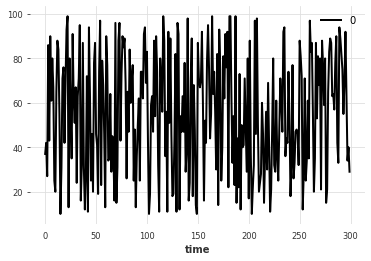

In [188]:
random_time_series.plot() 

In [127]:
rand_list = [auto_corr(random_time_series, ll) for ll in range(150)]

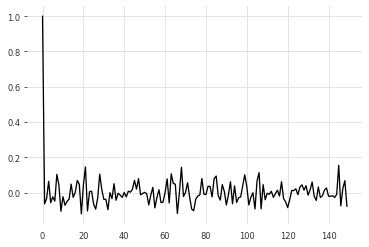

In [129]:
plt.plot(range(150), rand_list)

According to the above plot auto-correlation is nothing but fluctuations around zero for a random data set.

### Data with polynomial time dependency

In [139]:
a=3
b=2
lin_time=10
lindata =[a*i+b for i in range(time)]
linear_time_series = TimeSeries.from_values(np.array(lindata))

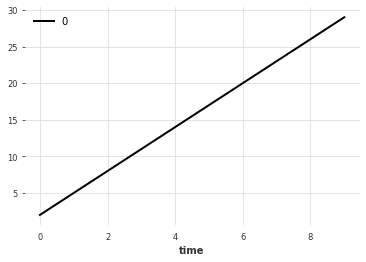

In [140]:
linear_time_series.plot()

In [141]:
linear_list = [auto_corr(linear_time_series, ll) for ll in range(lin_time)]

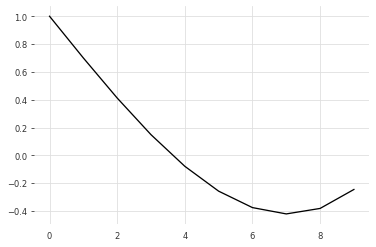

In [143]:
plt.plot(range(lin_time), linear_list)

In [169]:
a=3
b=3
p=3
nonlin_time=30
nonlindata =[a*i**p+b for i in range(nonlin_time)]
nonlinear_time_series = TimeSeries.from_values(np.array(nonlindata))

In [170]:
nonlinear_list = [auto_corr(nonlinear_time_series, ll) for ll in range(nonlin_time)]

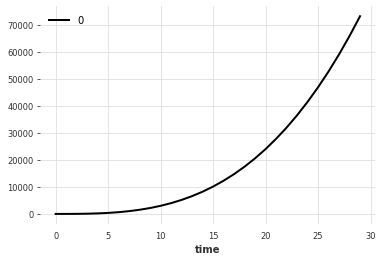

In [171]:
nonlinear_time_series.plot()

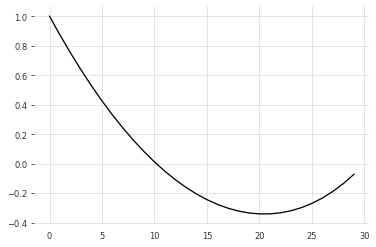

In [176]:
plt.plot(range(nonlin_time), nonlinear_list)

In [183]:
a = 3
aa = -4
b = 3
p = 3
nonlin_time = 30
nonlindata = [a*i**p+ aa*i**p +b for i in range(nonlin_time)]
nonlinear_time_series = TimeSeries.from_values(np.array(nonlindata))

In [184]:
nonlinear_list = [auto_corr(nonlinear_time_series, ll) for ll in range(nonlin_time)]

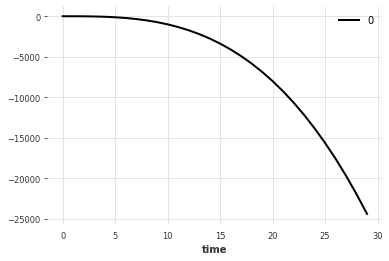

In [185]:
nonlinear_time_series.plot() # plotting the time series

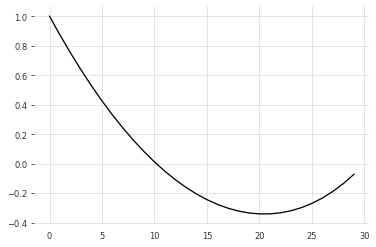

In [186]:
plt.plot(range(nonlin_time), nonlinear_list) # plotting auto_corr function of non-linear data

what we can conclude in this stage is that auto-correlation shows qualitatively similar behavior for data with polynomial time dependency of various degrees